<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [ ]:
#23-10-2022

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import plotly.io as pio
pio.renderers.default='notebook'

# Исследование структуры данных

1) Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [4]:
hh_database = pd.read_csv('P:\_Data Scientist DSPR-107\SF_PROJECT\PROJECT-1_HeadHunter\data\dst-3.0_16_1_hh_database.csv', sep=';')
dhh = hh_database.copy()

2) Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [5]:
dhh.tail(2)

Пол, возраст           ЗП  \
44742  Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743   Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

      Ищет работу на должность:  \
44742          Контент-менеджер   
44743      Руководитель проекта   

                            Город, переезд, командировки  \
44742  Тамбов , не готов к переезду , не готов к кома...   
44743  Москва , не готов к переезду , не готов к кома...   

                                   Занятость            График  \
44742  частичная занятость, полная занятость  удаленная работа   
44743                       полная занятость       полный день   

                                             Опыт работы  \
44742  Опыт работы 3 года 10 месяцев  Контент-менедже...   
44743  Опыт работы 15 лет 10 месяцев  Руководитель пр...   

      Последнее/нынешнее место работы  \
44742                       IQ-Maxima   
44743               ПАО ГК ТНС энерго   

                    Последняя/нынешняя должность  \
44742                          Менеджер проектов   
44743  Руководитель отдела технической поддержки   

                                       Образование и ВУЗ Обновление резюме  \
44742  Высшее образование 2015  Тамбовский государств...  26.04.2019 14:25   
44743  Высшее образование 1997  Южно-Российский госуд...  05.07.2018 20:15   

                                 Авто  
44742  Имеется собственный автомобиль  
44743                      Не указано

3) Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [6]:
dhh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4) Обратите внимание на информацию о числе непустых значений.

In [7]:
# ищем колонки с пропусками и выводим количество пустых значений 
cols = dhh.columns
for col in cols:
    if dhh[col].count() != dhh.shape[0]:
        print(f'{col}, \n количество пустых значений: {44744 - dhh[col].count()} \n -----------------------') # делаем читабельный вид отчета


Опыт работы, 
 количество пустых значений: 168 
 -----------------------
Последнее/нынешнее место работы, 
 количество пустых значений: 1 
 -----------------------
Последняя/нынешняя должность, 
 количество пустых значений: 2 
 -----------------------


5) Выведите основную статистическую информацию о столбцах.


In [8]:
dhh.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [9]:
# создаём функцию, которая берёт первое слово из колонки 'Образование и ВУЗ' , сравнивает и вставляет в новую колонку 'Образование'
def get_education(arg):
    args_splited = arg.split(' ')
    if args_splited[0] == 'Неоконченное': return 'неоконченное высшее'
    if args_splited[0] == 'Высшее': return 'высшее'
    if args_splited[0] == 'Среднее':
        if args_splited[1] == 'специальное': return 'среднее специальное'
        if args_splited[1] == 'образование': return 'среднее'

dhh['Образование'] = dhh['Образование и ВУЗ'].apply(get_education)  

In [10]:
# смотрим какое количество со средним образованием
dhh['Образование'].value_counts()
# 559

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

In [11]:
dhh[dhh['Образование'] == 'среднее'].shape[0]

559

In [12]:
# удаляем признак "Образование и ВУЗ"
del dhh["Образование и ВУЗ"]

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [13]:
# создаём функцию, которая берёт первое слово из колонки 'Пол, возраст' , сравнивает и вставляет в новую колонку 'Пол'
def get_gender(arg):
    args_splited = arg.split(' ')
    if args_splited[0] == 'Мужчина': return 'М'
    if args_splited[0] == 'Женщина': return 'Ж'
    
dhh['Пол'] = dhh['Пол, возраст'].apply(get_gender)  

In [14]:
# Сколько процентов женских резюме представлено в наших данных? 
dhh['Пол'].value_counts(normalize=True)*100
# 19%

М    80.929287
Ж    19.070713
Name: Пол, dtype: float64

In [15]:
# создаём функцию, которая берёт первое слово из колонки 'Пол, возраст' , сравнивает и вставляет в новую колонку 'Пол'
def get_age(arg):
    args_splited = arg.split(' ')
    age = int(args_splited[3])
    return age
 
dhh['Возраст'] = dhh['Пол, возраст'].apply(get_age) 

#Понизим размерность, диапазон до 127 вполне достаточно
dhh = dhh.astype({'Возраст': np.int8})

#  Удаляем признак "Пол, возраст" из таблицы
del dhh['Пол, возраст']


In [16]:
# Чему равен средний возраст соискателей? Ответ округлите до десятых.
round((dhh['Возраст'].mean()),2)
# 32.2

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [17]:

def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None 
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']
    args_splited = arg.split(' ')
    args_splited = args_splited[2:6]  # т.к. структура строк всегда одинакова, нужные данные со 2 по 5е слово
    month = 0
    year = 0
    for i in range(len(args_splited)):
        if args_splited[i] in month_key_words:
            month = args_splited[i-1]
        if args_splited[i] in year_key_words:
            year = args_splited[i-1]
    return int(year)*12 + int(month)

dhh['Опыт работы (месяц)'] = dhh['Опыт работы'].apply(get_experience)

#  Удаляем признак "Опыт работы" из таблицы
del dhh['Опыт работы']

In [18]:
# Чему равен медианный опыт работы (в месяцах) в нашей таблице?
dhh['Опыт работы (месяц)'].median()
#100

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [19]:
# создаём колонку "Город" на 4 категории: "Москва", "Санкт-Петербург", "город-миллионник", "другие"
def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    capitals = ['Москва', 'Санкт-Петербург']
    million_cities_plus = million_cities + capitals
    args_splited = arg.split(' ')
    if args_splited[0] == 'Москва': return 'Москва'
    if args_splited[0] == 'Санкт-Петербург': return 'Санкт-Петербург'
    if args_splited[0] in million_cities: return 'город-миллионник'
    if args_splited[0] not in million_cities_plus: return 'другие'

    
dhh['Город'] = dhh['Город, переезд, командировки'].apply(get_city)    

In [20]:
# Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
round(dhh['Город'].value_counts(normalize=True)*100)
# 11

Москва              37.0
другие              37.0
город-миллионник    15.0
Санкт-Петербург     11.0
Name: Город, dtype: float64

In [23]:
# Готовность к переезду. Используем тот факт , что структура текста одинакова
def ready_to_move(arg):
    args_splited = arg.split(' ')
    
    for i in range(len(args_splited)):
        if args_splited[i] == 'переезду':
            if args_splited[i-3] == 'не': return False
            else: return True
            
        if args_splited[i] == 'переехать': return True
            

dhh['Готовность к переезду'] = dhh['Город, переезд, командировки'].apply(ready_to_move) 

# Готовность к командировкам
def ready_for_trips(arg):
    args_splited = arg.split(' ')
    
    for i in range(len(args_splited)):
        if args_splited[i] == 'командировкам':
            if args_splited[i-3] == 'не': return False
            else: return True
            
    return False

dhh['Готовность к командировкам'] = dhh['Город, переезд, командировки'].apply(ready_for_trips) 

#  Удаляем признак "Город, переезд, командировки" из таблицы
del dhh['Город, переезд, командировки']

In [24]:
# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
round(dhh[(dhh['Готовность к командировкам'] == True) & (dhh['Готовность к переезду'] == True)].shape[0]/ dhh.shape[0] *100)
# 32

32

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [25]:
occupations = ['волонтерство', 'полная занятость', 'проектная работа', 'стажировка', 'частичная занятость']
schedules = ['вахтовый метод', 'гибкий график', 'полный день', 'сменный график', 'удаленная работа']

for occupation, schedule in zip(occupations, schedules):
    dhh[occupation] = dhh['Занятость'].apply(lambda x: occupation in x)
    dhh[schedule] = dhh['График'].apply(lambda x: schedule in x)

#  Удаляем признак "Занятость", "График"  из таблицы
del dhh['Занятость']
del dhh['График']    

In [26]:
# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
dhh[(dhh['проектная работа'] == True) & (dhh['волонтерство'] == True)].shape[0]
# 436

436

In [27]:
# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
round(dhh[(dhh['вахтовый метод'] == True) & (dhh['гибкий график'] == True)].shape[0])
# 2311

2311

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [29]:
# Загружаем данные по курсам валют в соответствующий период
ExchangeRates = pd.read_csv("P:\_Data Scientist DSPR-107\SF_PROJECT\PROJECT-1. Анализ резюме из HeadHunter\data\ExchangeRates.csv", sep=',')
der = ExchangeRates.copy()

In [ ]:
# удаляем не нужные столбцы
der.drop(['per', 'time', 'vol'], axis=1, inplace=True)

In [32]:
der.head()

currency      date    close  proportion
0      USD  29/12/17  57.6291           1
1      USD  30/12/17  57.6002           1
2      USD  31/12/17  57.6002           1
3      USD  01/01/18  57.6002           1
4      USD  02/01/18  57.6002           1

In [33]:
# Преобразуем столбец "Обновление резюме" в формат datetime
dhh['Обновление резюме'] =  pd.to_datetime(dhh['Обновление резюме'], format='%d.%m.%Y  %H:%M')

# Выделяем из столбеца "Обновление резюме" только дату
dhh['date'] = pd.to_datetime(dhh['Обновление резюме']).dt.date

# Преобразуем столбец date из двух dataset в формат datetime
der['date'] =  pd.to_datetime(der['date'], format='%d/%m/%y')
dhh['date'] =  pd.to_datetime(dhh['date'])

# Разделим столбец "ЗП" на два: отдельно сумма, отдельно обозначение валюты
dhh[['Сумма ЗП','Валюта ЗП']] = dhh['ЗП'].str.split(expand=True)

# переводим в float
dhh = dhh.astype({'Сумма ЗП': np.float32})

#Создаём столбец с наименованием валюты по стандарту ISO
dhh['currency'] = dhh['Валюта ЗП'].replace({'руб.': 'RUB', 'бел.руб.': 'BYN', 'грн.': 'UAH', 'сум': 'UZS'})

# Объединяем нашу таблицу и таблицу курсов валют
dmer = dhh.merge(
    der, 
    left_on=['currency', 'date'],
    right_on=['currency', 'date',], 
    how='left'
)

# Заполняем пропуски в двух колонках единицами
dmer[['close', 'proportion']] = dmer[['close','proportion']].fillna(value=1)

#Создаём столбец c зарплатой в рублях, через вычисления по курсу, соответствующему на дату обновления резюме
dmer['ЗП руб.'] = dmer['Сумма ЗП']*dmer['close']/dmer['proportion']


In [34]:
# удалить
dmer['currency'].nunique()

9

In [35]:
# ячейку удалить?
dmer.head(2)

ЗП Ищет работу на должность: Последнее/нынешнее место работы  \
0  29000 руб.   Системный администратор         МАОУ "СОШ № 1 г.Немана"   
1  40000 руб.      Технический писатель    Временный трудовой коллектив   

                       Последняя/нынешняя должность   Обновление резюме  \
0                           Системный администратор 2019-04-16 15:59:00   
1  Менеджер проекта, Аналитик, Технический писатель 2019-04-12 08:42:00   

                             Авто          Образование Пол  Возраст  \
0  Имеется собственный автомобиль  неоконченное высшее   М       39   
1                      Не указано               высшее   М       60   

   Опыт работы (месяц)  ... сменный график  частичная занятость  \
0                202.0  ...           True                 True   
1                233.0  ...           True                 True   

   удаленная работа       date  Сумма ЗП  Валюта ЗП  currency  close  \
0              True 2019-04-16   29000.0       руб.       RUB    1.0   
1              True 2019-04-12   40000.0       руб.       RUB    1.0   

   proportion  ЗП руб.  
0         1.0  29000.0  
1         1.0  40000.0  

[2 rows x 30 columns]

In [36]:
# удаляем не нужные столбцы
dmer = dmer.drop(['ЗП', 'Обновление резюме','Сумма ЗП','Валюта ЗП','currency','close','proportion'], axis=1)

In [37]:
dmer.head(2)

Ищет работу на должность: Последнее/нынешнее место работы  \
0   Системный администратор         МАОУ "СОШ № 1 г.Немана"   
1      Технический писатель    Временный трудовой коллектив   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   

                             Авто          Образование Пол  Возраст  \
0  Имеется собственный автомобиль  неоконченное высшее   М       39   
1                      Не указано               высшее   М       60   

   Опыт работы (месяц)   Город  Готовность к переезду  ...  полная занятость  \
0                202.0  другие                  False  ...              True   
1                233.0  другие                  False  ...              True   

   гибкий график  проектная работа  полный день  стажировка  сменный график  \
0           True              True         True       False            True   
1           True              True         True       False            True   

   частичная занятость  удаленная работа       date  ЗП руб.  
0                 True              True 2019-04-16  29000.0  
1                 True              True 2019-04-12  40000.0  

[2 rows x 23 columns]

In [39]:
duplicates = dmer[dmer.duplicated(subset=dmer.columns)]
display(duplicates)


Ищет работу на должность:  \
380    системный администратор, информационная безопа...   
543                                             Аналитик   
876                              Системный администратор   
1038                             Главный инженер проекта   
1116   Руководитель отдела программирования станков с...   
...                                                  ...   
37481                                    Веб разработчик   
37841                                  менеджер проектов   
37932                         Специалист по тестированию   
40081                                     Data Scientist   
41997                                        Программист   

                         Последнее/нынешнее место работы  \
380                                    ООО "Техкомплект"   
543    Федеральная служба по регулированию алкогольно...   
876                            ЗАО БАНК РУССКИЙ СТАНДАРТ   
1038                                ООО "Локальные сети"   
1116                   Инженерный Центр Металлообработки   
...                                                  ...   
37481                                Creative Force Team   
37841  Общество с ограниченной ответственностью Интер...   
37932                                      Amphora Group   
40081                                         Минтруд ЧР   
41997                                           профи.ру   

                      Последняя/нынешняя должность  \
380                        Системный администратор   
543                     Главный специалист-эксрепт   
876    Специалист отдела информационных технологий   
1038                               Главный инженер   
1116                          Технический директор   
...                                            ...   
37481                                   Основатель   
37841                            менеджер проектов   
37932                Специалист по тестированию ПО   
40081       Специалист отдела по защиты информации   
41997                                Преподаватель   

                                 Авто          Образование Пол  Возраст  \
380    Имеется собственный автомобиль               высшее   М       38   
543                        Не указано               высшее   М       26   
876    Имеется собственный автомобиль               высшее   М       36   
1038                       Не указано               высшее   М       29   
1116   Имеется собственный автомобиль               высшее   М       37   
...                               ...                  ...  ..      ...   
37481  Имеется собственный автомобиль               высшее   М       33   
37841                      Не указано               высшее   Ж       28   
37932                      Не указано  неоконченное высшее   М       27   
40081                      Не указано               высшее   М       25   
41997  Имеется собственный автомобиль               высшее   М       30   

       Опыт работы (месяц)             Город  Готовность к переезду  ...  \
380                  207.0  город-миллионник                  False  ...   
543                   40.0   Санкт-Петербург                  False  ...   
876                   99.0  город-миллионник                  False  ...   
1038                 125.0            Москва                   True  ...   
1116                 168.0  город-миллионник                   True  ...   
...                    ...               ...                    ...  ...   
37481                212.0            другие                   True  ...   
37841                 65.0            другие                  False  ...   
37932                 77.0            Москва                   True  ...   
40081                 46.0            другие                   True  ...   
41997                 90.0            Москва                   True  ...   

       полная занятость  гибкий график  проектная работа  полный день  \
380                True           True             Fa

In [ ]:
dmer = dmer.drop_duplicates()
print(duplicates.shape[0])

In [ ]:
dmer.info()

In [ ]:
dmer.loc[:,['ЗП','Сумма ЗП','Валюта ЗП']]

In [ ]:


dmer.to_csv('data/dst_hh_clean_v1.csv', sep=';', encoding='utf-8', index=False)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [ ]:
# ячейку удалить?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

dmer_database = pd.read_csv('data/dst_hh_clean_v1.csv', sep=';', encoding='utf-8')
dhh1 = dmer_database.copy()

In [40]:
dhh1 = dmer

In [41]:
dhh1.head(2)
#DB28A5
#DeepPink

Ищет работу на должность: Последнее/нынешнее место работы  \
0   Системный администратор         МАОУ "СОШ № 1 г.Немана"   
1      Технический писатель    Временный трудовой коллектив   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   

                             Авто          Образование Пол  Возраст  \
0  Имеется собственный автомобиль  неоконченное высшее   М       39   
1                      Не указано               высшее   М       60   

   Опыт работы (месяц)   Город  Готовность к переезду  ...  полная занятость  \
0                202.0  другие                  False  ...              True   
1                233.0  другие                  False  ...              True   

   гибкий график  проектная работа  полный день  стажировка  сменный график  \
0           True              True         True       False            True   
1           True              True         True       False            True   

   частичная занятость  удаленная работа       date  ЗП руб.  
0                 True              True 2019-04-16  29000.0  
1                 True              True 2019-04-12  40000.0  

[2 rows x 23 columns]

In [43]:
# График 4.1
fig = px.histogram(
    data_frame=dhh1,
    x='Возраст',
    title='<b>Распределение возраста соискателей HH<b>',
    histnorm='percent',
    height=500,
    width=1000,
    marginal='box',
    color_discrete_sequence=["BlueViolet"]
)
fig.update_layout(yaxis_title="<b>Процент соискателей<b>")
fig.update_layout(xaxis_title="<b>Возраст соискателей<b>")
fig.update_layout(
    font_family="Courier New",
    font_color="#60DD49",
    font_size=16,
    title_font_color="RebeccaPurple",
    title_font_size=24,
    legend_title_font_color="DarkMagenta",
    )
fig.show()

<img src='graphics\plot41.png'>

Наибольшее количество (мода) соискателей на платформе НН составляют люди в возрасте 30 лет. Это видно по пику гистограммы. Минимальный возраст соискателя 14 лет, максимальный 100. Но то и другое может оказаться выбросом, которым можно пренебречь. Возраст большинства соискателей находятся примерно в границах 22-40 лет. Взраст соискателей 76,77,100 лет скорее аномалии, так же как и возраст до 16 лет. 

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [45]:
# График 4.2
fig = px.histogram(
    data_frame=dhh1,
    x='Опыт работы (месяц)',
    title='<b>Распределение опыта работы соискателей HH<b>',
    histnorm='percent',
    height=500,
    width=1200,
    marginal='box',
    color_discrete_sequence=["BlueViolet"]
)
fig.update_layout(yaxis_title="<b>Процент соискателей<b>")
fig.update_layout(xaxis_title="<b>Опыт работы в месяцах<b>")
fig.update_layout(
    font_family="Courier New",
    font_color="#60DD49",
    font_size=16,
    title_font_color="RebeccaPurple",
    title_font_size=24,
    legend_title_font_color="DarkMagenta",
)
fig.show()


<img src='graphics\plot42.png'>

Наибольший опыт работы от 80 до 84 месяцев. Предельные значения от 0 до 663 месяцев (более реально 586 мес) (1188 мес не берём в расчет, т.к. это 99 лет). Опыт работы большинства соискателей находится в примерном интервале от 5-9 мес до 160-164 мес. К аномалиям отнёс бы 4 точки с 622 мес и выше.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [66]:
data31 = dhh1[dhh1['ЗП руб.'] < 500_000]
fig = px.histogram(
    data_frame=data31,
    x='ЗП руб.',
    title='Распределение желаемой з/п соискателей',
    #histnorm='percent',
    #width=10000,
    marginal='box'
)
fig.show()

In [67]:
data32 = dhh1[dhh1['ЗП руб.'] > 500_000]
fig = px.histogram(
    data_frame=data32,
    x='ЗП руб.',
    title='Распределение желаемой з/п соискателей',
    #histnorm='percent',
    #width=10000,
    marginal='box'
)
fig.show()

In [62]:
fig = px.histogram(
    data_frame=dhh1,
    x='ЗП руб.',
    title='Распределение желаемой з/п соискателей',
    #histnorm='percent',
    width=10000,
    marginal='box'
)
fig.show()

In [ ]:
# График 4.2
fig = px.histogram(
    data_frame=dhh1,
    x='Опыт работы (месяц)',
    title='<b>Распределение опыта работы соискателей HH<b>',
    histnorm='percent',
    height=500,
    width=1200,
    marginal='box',
    color_discrete_sequence=["BlueViolet"]
)
fig.update_layout(yaxis_title="<b>Процент соискателей<b>")
fig.update_layout(xaxis_title="<b>Опыт работы в месяцах<b>")
fig.update_layout(
    font_family="Courier New",
    font_color="#60DD49",
    font_size=16,
    title_font_color="RebeccaPurple",
    title_font_size=24,
    legend_title_font_color="DarkMagenta",
)
fig.show()

In [47]:
data2 = dhh1.groupby(['Образование'])['ЗП руб.'].median()

fig = px.bar(
    data_frame=data2,
    x='ЗП руб.',
    #y='Образование',
    height=300,
    width=900,
    title='<b>Соотношение зарплаты и образования<b>',
    #color_discrete_sequence=px.colors.qualitative.Vivid
    color= 'ЗП руб.',
    #color_discrete_map=px.colors.qualitative.Vivid
)
fig.update_layout(yaxis_title="Уровень образования")
fig.update_layout(xaxis_title="Медиана запрашиваемой зарплаты")
fig.update_layout(
    font_family="Courier New",
    font_color="DarkBlue",
    font_size=14,
    #title_font_family="Times New Roman",
    title_font_color="RebeccaPurple",
    title_font_size=24,
    legend_title_font_color="DarkMagenta",
    #size=16
)
fig.show()

ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [48]:
data1 = dhh1[dhh1['ЗП руб.'] < 1_000_000].groupby(['Образование']).median()

fig = px.bar(
    data_frame=data1,
    x='ЗП руб.',
    #y='Образование',
    height=300,
    width=700,
    title='Соотношение зарплаты и образования',
    #color_discrete_sequence=px.colors.qualitative.Vivid
    color= 'ЗП руб.',
    #color_discrete_map=px.colors.qualitative.Vivid
)
fig.update_layout(yaxis_title="Уровень образования")
fig.update_layout(xaxis_title="Медиана запрашиваемой зарплаты")
fig.show()




C:\Users\Asylum\AppData\Local\Temp\ipykernel_13072\1378299742.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [49]:
#Задание 4.4
data1 = dhh1[dhh1['ЗП руб.'] < 1_000_000].groupby('Образование', as_index=False).median()

fig = px.bar(
    data_frame=data1,
    x='Образование',
    y='ЗП руб.',
    #x='ЗП руб.',
    #y='Образование',
    height=400,
    width=900,
    title='Соотношение зарплаты и образования',
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    color= 'Образование',
    #color_discrete_map=px.colors.qualitative.Vivid
)
fig.update_layout(yaxis_title="Медиана запрашиваемой зарплаты")
fig.update_layout(xaxis_title="Уровень образования")
fig.show()

C:\Users\Asylum\AppData\Local\Temp\ipykernel_13072\4137993411.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<img src=plot44.png>

https://github.com/Wladeemer/SF_DSPR-107-PROJECT-1-Analyzing_Data_HH/blob/master/

In [50]:
bar_data = dhh1[dhh1['ЗП руб.']<1e6].groupby('Образование', as_index=False).median()
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП руб.',
    title='Медианная з/п по уровню образования'
)
fig.show()

C:\Users\Asylum\AppData\Local\Temp\ipykernel_13072\2823055603.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [51]:
data1 = dhh1[dhh1['ЗП руб.'] < 1_000_000].groupby('Город', as_index=False).median()

fig = px.bar(
    data_frame=data1,
    x='Город',
    y='ЗП руб.',
    #x='ЗП руб.',
    #y='Образование',
    height=400,
    width=900,
    title='Соотношение зарплаты ',
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    color= 'Город',
    #color_discrete_map=px.colors.qualitative.Vivid
)
fig.update_layout(yaxis_title="Медиана запрашиваемой зарплаты")
fig.update_layout(xaxis_title="Локация соискателя")
fig.show()

C:\Users\Asylum\AppData\Local\Temp\ipykernel_13072\2375877027.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [52]:
data3 = dhh1[dhh1['ЗП руб.']<1e6]
fig = px.box(
    data_frame=data3,
    x='ЗП руб.',
    y='Город',
    color='Город',
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    title='Города и зарплаты'
)
fig.update_layout(yaxis_title="Кластеры городов и столицы")
fig.update_layout(xaxis_title="Запрашиваемая зарплата")
fig.show()

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [55]:
data4 = dhh1.groupby(['Готовность к командировкам', 'Готовность к переезду'], as_index=False)['ЗП руб.'].median()
fig = px.bar(
    data_frame=data4,
    y='Готовность к переезду',
    x='ЗП руб.',
    barmode="group",
    color='Готовность к командировкам',
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    orientation='h',
    title='<b>Зависимость медианной зарплаты от готовности к командировкам и переезду<b>'
)
fig.update_layout(yaxis_title="<b>Готовность к переезду<b>")
fig.update_layout(xaxis_title="<b>Запрашиваемая зарплата<b>")
fig.update_layout(
    font_family="Courier New",
    font_color="DeepPink",
    title_font_color="RebeccaPurple",
    legend_title_font_color="DarkMagenta",
    font_size=16
)
fig.show()


In [ ]:
def out_red(text):
    print("\033[33m{}".format(text))
out_red("ПРИВЕТ")

In [ ]:
print("\033[3m\033[33m\033[41m{}\033[0m".format("Htua_0111100000"))

In [ ]:
ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

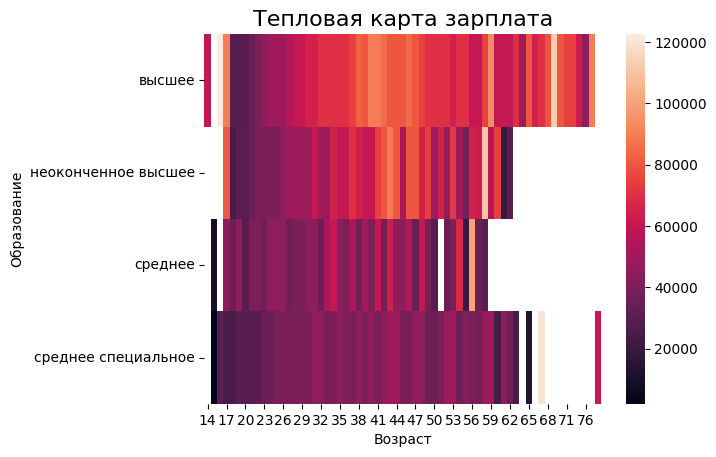

In [56]:


pivot = data3.pivot_table( values='ЗП руб.', index='Образование', columns='Возраст', aggfunc='median')

heatmap = sns.heatmap(data=pivot) #, cmap='Wistia', annot=False)
heatmap.set_title('Тепловая карта зарплата', fontsize=16);

In [57]:
pivot = data3.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП руб.',
    aggfunc='median',
    fill_value=0
)
fig = px.imshow(
    pivot,
    aspect='auto',
    color_continuous_scale='ylorbr',
    title='Медианная з/п по образованию и возрасту'
)
fig.show()

In [ ]:
'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].

In [ ]:
dhh1.head(1)

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

(7, 24)


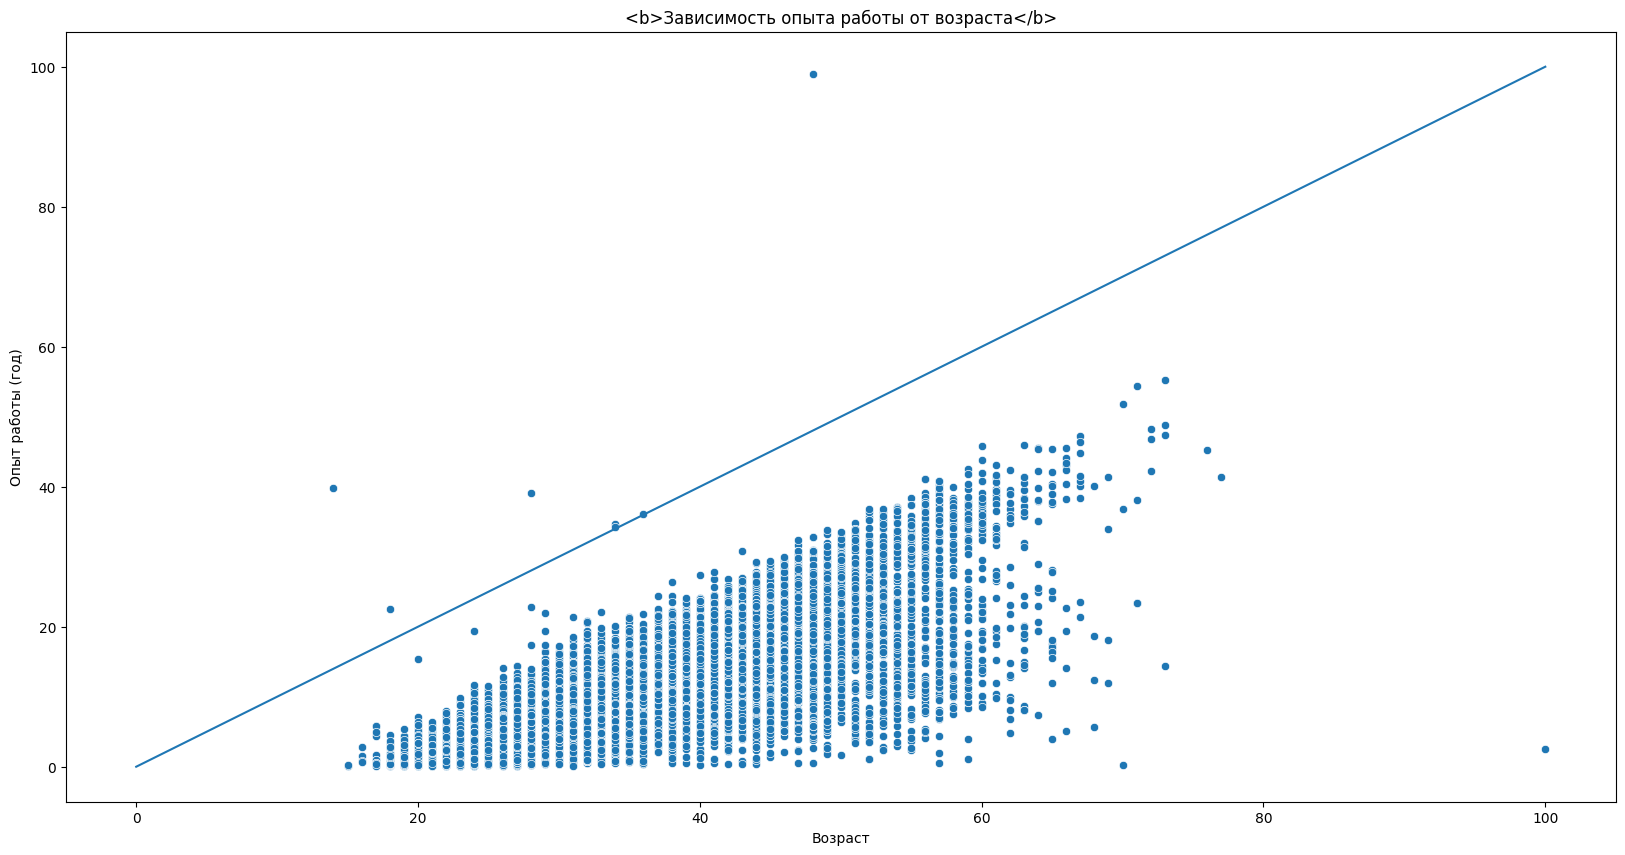

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20, 10))
scatter_data = dhh1.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяц)']/12
sns.lineplot(x=[0, 100], y=[0, 100])
ax = sns.scatterplot(
    data=scatter_data, 
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Зависимость опыта работы от возраста');
print(scatter_data[scatter_data['Опыт работы (год)']>= scatter_data['Возраст']].shape)

In [ ]:
import plotly.express as px 
import pandas as pd 
import numpy as np 

# Get some data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

# Plot 
fig = px.line(df, x='Date', y='AAPL.High')

# Only thing I figured is - I could do this 
fig.add_scatter(x=df['Date'], y=df['AAPL.Low']) # Not what is desired - need a line 

# Show plot 
fig.show()

In [ ]:
fig = px.line(x=[0, 100], y=[0, 100])
fig.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20, 10))
scatter_data = dhh1.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяц)']/12
sns.lineplot(x=[0, 100], y=[0, 100])
ax = sns.scatterplot(
    data=scatter_data, 
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Зависимость опыта работы от возраста');

In [ ]:
fig = px.line(dhh1,x=dhh1['Возраст'], y=dhh1['Опыт работы (месяц)'])
fig.add_scatter(data_frame=dhh1,
    x='Возраст', 
    y='Опыт работы (месяц)',
    #color='Exited',
    #height=500, 
    #width=700, 
    #title='Зависимость опыта работы от возраста')
)
fig.show()    

In [ ]:

fig = px.scatter(
    data_frame=dhh1,
    x='Возраст', 
    y='Опыт работы (месяц)',
    #trendline="ols",
    height=500, 
    width=700, 
    title='Зависимость опыта работы от возраста'
    
)
#fig.add_line(x=[0, 100], y=[0, 100])
fig.show()


ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
duplicateRows = hh_database[hh_database.duplicated ()]
display(duplicateRows)

In [ ]:
dhh1['Опыт работы (месяц)'].isnull().sum()

In [ ]:
duplicates = dhh1[dhh1.duplicated(subset=dhh1.columns)]


In [ ]:
display(duplicates)

In [ ]:
dhh1.head(3)

In [ ]:
dhh1 = dhh1.drop_duplicates()
display(duplicates.shape[0])

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
dhh1 = dmer.copy()

In [ ]:
dhh1.info()

In [ ]:
dhh1.shape[0]

In [ ]:
# ищем колонки с пропусками и выводим количество пустых значений 
cols = dhh1.columns
for col in cols:
    if dhh1[col].count() != dhh1.shape[0]:
        print(f'{col}, \n количество пустых значений: {dhh1.shape[0] - dhh1[col].count()} \n -----------------------') # делаем читабельный вид отчета
#168        

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
drop_data = dhh1.copy()

In [ ]:
drop_data.isnull().mean()

In [ ]:
#создаем копию исходной таблицы
#drop_data = dhh1.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
#thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
#drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

In [ ]:
dhh1.info()

In [ ]:
#создаем копию исходной таблицы
fill_data = dhh1.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    
    'Опыт работы (месяц)': fill_data['Опыт работы (месяц)'].median(),
    
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

In [ ]:
fill_data.info()

In [ ]:
fill_data['Опыт работы (месяц)'].mean()

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
outliers = fill_data[(fill_data['ЗП руб.'] > 1e6) | (fill_data['ЗП руб.'] < 5000)]


In [ ]:
fill_data.index

In [ ]:
fill_data.iloc[510:517,:]

In [ ]:
fill_data.iloc[43134,:]

In [ ]:
outliers['ЗП руб.']

In [ ]:
fill_data = fill_data.drop(outliers.index)


In [ ]:
print(outliers.shape[0])

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
fill_data = fill_data.drop(outliers.index)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь